# Project: Investigate a Dataset - [No-Show-Apointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, I'll be analyzing the no-show-appointments dataset to investigate the factors that determines whether a patient will show up for a scheduled appointment or not. 
In particular, I'll explore how the nature of the patient sickness(es) affects their showing up.
The column names in this dataset are:

###### -PatientId
###### -AppointmentID
###### -Gender
###### -ScheduledDay 
###### -AppointmentDay
###### -Age
###### -Neighbourhood
###### -Scholarship
###### -Hipertension 
###### -Diabetes 
###### -Alcoholism 	
###### -Handcap 
###### -SMS_received 
###### -No-show


### Question(s) for Analysis
The following are a list of questions to be answered after carefully studying the dataset:
1. Which gender of patients showed up more for an appointment?
2. Do patients with a particular type of sickness show up more for an appointment?
3. Which disease or sickness has the highest number of patients suffering from it and what gender   classification suffers most from a particular sickness?
4. Which neighbourhood had the highest number of record and does the location of the hospital (Neighbourhood) affect the show up of a patient?
5. Are patients enrolled in the scholarship welfare program more likely to show up for their appointments?
6. Were patients who received an SMS more likely to show for their appointment?
7. Does Age have an influence on a patient showing up or not?
8. Does the the difference between the scheduled and appointment day affect a patient showing up?

In [1]:
# The packages used for this analysis are imported below
# % matplotlib inline was imported to enable visualizations show in the workbook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# The dataset was loaded with pandas to fetch the first five rows below
df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#checking the number of rows and columns in the dataset
df.shape

(110527, 14)

In [4]:
#checking for the data type of each column and columns with null values in the dataset
## No column had null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#checking the descriptive statistics of each numerical columns in the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

From the previous code, it was seen that 'Age' column has negative values
The code below will check for the rows with negative values using the query function and drop them using the drop function which reduced the number of rows by one.
There was only 1 incorrect age value with a negative number.

In [6]:
# dropping the age entry where age is less than 0
df.drop(df.query('Age < 0').index, inplace=True)
df.shape

(110526, 14)

I changed all the column labels to lowercase for easy understanding and avoiding errors while trying to use them as seen below.

In [7]:
df.rename(columns=lambda x: x.lower(), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I discovered that to answer the questions above for analysis, I won't be needing the patientid and appointmentid columns.
Hence, the columns will be dropped below.

In [8]:
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


It was noticed that the 'no-show' column was quite confusing to understand what yes and no means. According to the dataset, No represented that the patient showed up while Yes represented that the patient did not show up.
Therefore, I changed the name of the column to 'shown' and changed No entries to Yes and Yes entries to No.
The steps to do this are carried out below.

In [9]:
# changing column name from 'no-show' to 'shown'
df.rename(columns={'no-show' : 'shown'}, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# querying the dataframe to show only entries with'No' from the 'shown' column
df_shown_no = df.query('shown == "No"')
df_shown_no

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [11]:
# querying the dataframe to show only entries with'Yes' from the 'shown' column
df_shown_yes = df.query('shown == "Yes"')
df_shown_yes

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


In [12]:
# formatting the entries of the 'shown' column by replacing 'Yes' with 'No' and vice versa
df.shown = df.shown.replace(['Yes', 'No'], ['No', 'Yes'])
df.head(11)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,Yes
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,No
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,No
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,Yes
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,Yes


The datatype for the scheduledday and appointmentday is in string format rather than datetime format.
The data type is therfore changed to date data type as seen below.

In [13]:
df.scheduledday = df.scheduledday.astype('datetime64[ns]')

In [14]:
df.appointmentday = df.appointmentday.astype('datetime64[ns]')

In [15]:
# checking the data types to confirm that the data types has been changed
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
shown                     object
dtype: object

In [16]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [17]:
# using the normalize function to extract only the date from the 'scheduledday' column so as to rhyme with the 'appointmentday' column.
df.scheduledday = df.scheduledday.dt.normalize()
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [18]:
# renaming 'hipertension' and 'handcap' columns to 'hypertension' and 'handicap' respectively
df.rename(columns={'hipertension' : 'hypertension', 'handcap' : 'handicap'}, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


I added a new column named 'day_difference' beside the 'appointmentday' column which will calculate the difference between the scheduled day and appointment day

In [19]:
difference = df.appointmentday - df.scheduledday

In [20]:
df.insert(loc=3, column='day_difference', value=difference)
df

,gender,scheduledday,appointmentday,day_difference,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown
0,F,2016-04-29,2016-04-29,0 days,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29,2016-04-29,0 days,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29,2016-04-29,0 days,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29,2016-04-29,0 days,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29,2016-04-29,0 days,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,35 days,56,MARIA ORTIZ,0,0,0,0,0,1,Yes
110523,F,2016-05-03,2016-06-07,35 days,51,MARIA ORTIZ,0,0,0,0,0,1,Yes
110524,F,2016-04-27,2016-06-07,41 days,21,MARIA ORTIZ,0,0,0,0,0,1,Yes
110525,F,2016-04-27,2016-06-07,41 days,38,MARIA ORTIZ,0,0,0,0,0,1,Yes


 I changed the day_difference column to show only the day number.
 This was done by using the apply function as seen below.

In [21]:
# defining the column to be split
split_column = ['day_difference']

In [22]:
# using the apply function
for c in split_column:
    df[c] = df[c].apply(lambda x: x.days)

In [23]:
df.tail()

,gender,scheduledday,appointmentday,day_difference,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown
110522,F,2016-05-03,2016-06-07,35,56,MARIA ORTIZ,0,0,0,0,0,1,Yes
110523,F,2016-05-03,2016-06-07,35,51,MARIA ORTIZ,0,0,0,0,0,1,Yes
110524,F,2016-04-27,2016-06-07,41,21,MARIA ORTIZ,0,0,0,0,0,1,Yes
110525,F,2016-04-27,2016-06-07,41,38,MARIA ORTIZ,0,0,0,0,0,1,Yes
110526,F,2016-04-27,2016-06-07,41,54,MARIA ORTIZ,0,0,0,0,0,1,Yes


Seeing that the day_difference column is now showing only the numeric value, I used the describe method to check for negative values in the day_difference column which showed that there were negative values as shown below.
This means that in some columns, the scheduled day was greater than the appointment day (entry error).

In [24]:
df.describe()

,day_difference,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,10.183794,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,15.255034,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [25]:
df.query('day_difference < 0')

,gender,scheduledday,appointmentday,day_difference,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown
27033,M,2016-05-10,2016-05-09,-1,38,RESISTÊNCIA,0,0,0,0,1,0,No
55226,F,2016-05-18,2016-05-17,-1,19,SANTO ANTÔNIO,0,0,0,0,1,0,No
64175,F,2016-05-05,2016-05-04,-1,22,CONSOLAÇÃO,0,0,0,0,0,0,No
71533,F,2016-05-11,2016-05-05,-6,81,SANTO ANTÔNIO,0,0,0,0,0,0,No
72362,M,2016-05-04,2016-05-03,-1,7,TABUAZEIRO,0,0,0,0,0,0,No


To fix the error above, I made the values in the 'day_difference' column absolute so as to change all negative values to positive as seen below.

In [26]:
df.loc[(df.day_difference < 0),'day_difference'] = df.day_difference.abs()
df.head()

,gender,scheduledday,appointmentday,day_difference,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown
0,F,2016-04-29,2016-04-29,0,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29,2016-04-29,0,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29,2016-04-29,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,2016-04-29,2016-04-29,0,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [27]:
# checking to see that the minimum value for the 'day-difference' column is no longer negative.
df.describe()

,day_difference,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,10.183975,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,15.254914,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [28]:
# checking to see that there are no more negative values in the 'day_difference' column.
df.query('day_difference < 0')

,gender,scheduledday,appointmentday,day_difference,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,shown


In [29]:
# checking the number of unique neighbourhood in the dataset
df.neighbourhood.nunique()

81

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which gender of patients showed up more for an appointment?)

To answer this question, I first used the groupby function to group each gender by if they showed or didn't show up for an appointment as seen below.

In [30]:
df_gender = df.groupby(['gender', 'shown'])['gender'].count()
df_gender

gender  shown
F       No       14594
        Yes      57245
M       No        7725
        Yes      30962
Name: gender, dtype: int64

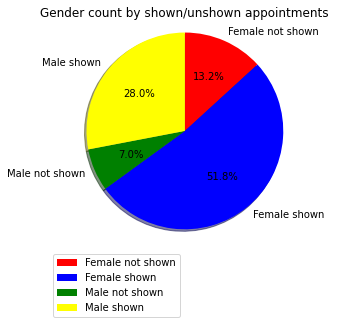

In [31]:
# A pie chart was then plotted to view the percentage of each category as shown below.
labels = ["Female not shown", "Female shown", 
          "Male not shown", "Male shown"]
colors = ['red','blue', 'green', 'yellow']
sizes = df_gender
plt.pie(sizes,labels=labels, colors=colors, counterclock=False, 
                         shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Gender count by shown/unshown appointments')
plt.legend(labels, loc='best', bbox_to_anchor=(0.5, -0.04), ncol=1)
plt.axis('equal')
plt.show()

From the visual above, it can be seen that the percentage of females in the dataset is 65% which is higher than that of male in the record (35%).
A conclusion would have been that more females attended an appointment (51.8%) as seen but it will make the conclusion bias because there are more females in the dataset.
To make a fair conclusion, the proportions for each gender will be taken and plotted in a bar chart.

In [32]:
# counting the total females in the dataset
total_female = len(df.query('gender=="F"'))
total_female

71839

In [33]:
# counting the total males in the dataset
total_male = len(df.query('gender=="M"'))
total_male

38687

In [34]:
# depicting females that showed for appointment
df_female_shown = len(df.query('gender == "F" & shown == "Yes"'))
df_female_shown

57245

In [35]:
# depicting males that showed for appointment
df_male_shown = len(df.query('gender == "M" & shown == "Yes"'))
df_male_shown

30962

In [36]:
# proportion of females that showed for appointment in relation to total females
prop_female_shown = (df_female_shown/total_female * 100)
prop_female_shown

79.68512924734476

In [37]:
# proportion of males that showed for appointment in relation to total males
prop_male_shown = (df_male_shown/total_male * 100)
prop_male_shown

80.03205211052808

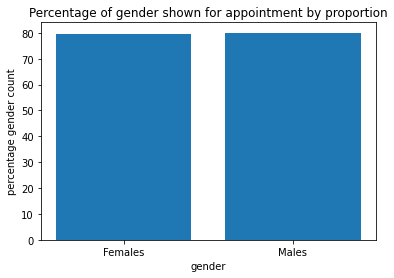

In [38]:
# bar chart depicting the gender percentage by proportion
locations = [1, 2]
heights = [prop_female_shown, prop_male_shown]
labels = ['Females', 'Males']
colors = ['green', 'orange']
plt.bar(locations, heights, tick_label=labels)
plt.title('Percentage of gender shown for appointment by proportion')
plt.xlabel('gender')
plt.ylabel('percentage gender count');

### ANSWER: Therefore, the answer to this question is that both genders showed up equally for an appointment
#### 79.7% female ~ 80% and 80% male

### Research Question 2  (Do patients with a particular type of sickness show up more for an appointment?)

To answer this question, I used the groupby function to group each sickness by if they showed or didn't show up for an appointment as seen below.


In [39]:
# hypertension group
df_hyp = df.groupby(['hypertension', 'shown'])['hypertension'].count()
df_hyp
# People with no hypertension showed up more for an appointment

hypertension  shown
0             No       18547
              Yes      70178
1             No        3772
              Yes      18029
Name: hypertension, dtype: int64

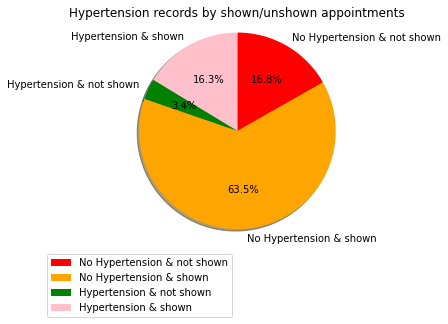

In [40]:
# pie chart showing the different categories
## definining a function to plot the pie chart to avoid repetition
def piechat_hypertension():
    labels = ["No Hypertension & not shown", "No Hypertension & shown", 
              "Hypertension & not shown", "Hypertension & shown"]
    colors = ['red','orange', 'green', 'pink']
    sizes = df_hyp
    plt.pie(sizes,labels=labels, colors=colors, counterclock=False, 
                             shadow=True, startangle=90, autopct='%1.1f%%');
    plt.title('Hypertension records by shown/unshown appointments')
    plt.legend(labels, loc='best', bbox_to_anchor=(0.5, -0.04), ncol=1)
    plt.axis('equal')
    plt.show()
# calling the function   
piechat_hypertension()

In [41]:
# diabetes group
df_dbt = df.groupby(['diabetes', 'shown'])['diabetes'].count()
df_dbt
# People with no diabetes showed up more for an appointment

diabetes  shown
0         No       20889
          Yes      81694
1         No        1430
          Yes       6513
Name: diabetes, dtype: int64

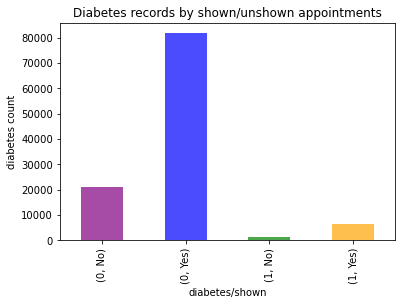

In [42]:
# Bar chart showing the different categories
colors = ['purple', 'blue', 'green', 'orange']
df_dbt.plot(kind='bar', title='Diabetes records by shown/unshown appointments', color=colors, alpha=.7)
plt.xlabel('diabetes/shown')
plt.ylabel('diabetes count');

In [43]:
#alcoholism group
df_alc = df.groupby(['alcoholism', 'shown'])['alcoholism'].count()
df_alc
# People with no alcoholism showed up more for an appointment

alcoholism  shown
0           No       21642
            Yes      85524
1           No         677
            Yes       2683
Name: alcoholism, dtype: int64

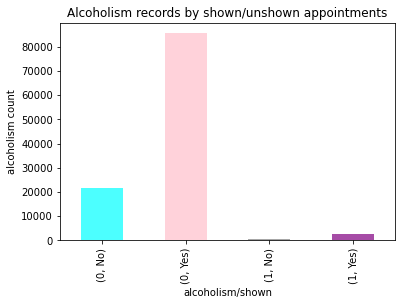

In [44]:
# Bar chart showing the different categories
colors = ['cyan', 'pink', 'grey', 'purple']
df_alc.plot(kind='bar', title='Alcoholism records by shown/unshown appointments', color=colors, alpha=.7)
plt.xlabel('alcoholism/shown')
plt.ylabel('alcoholism count');

### ANSWER: Therefore, the answer to this question is that people without hypertension, diabetes and alcoholism showed up more for an appointment

### Research Question 3 (Which disease or sickness has the highest number of patients suffering from it and what gender classification suffers most from a particular sickness?)

In [45]:
# querying the data to see the number of hypertension patients
hyp_count = len(df.query('hypertension == 1'))
hyp_count

21801

In [46]:
# querying for hypertension patients and getting the record count for female gender
hyp_female = len(df.query('hypertension == 1 & gender == "F"'))
hyp_female

15339

In [47]:
# querying for hypertension patients and getting the record count for male gender
hyp_male = len(df.query('hypertension == 1 & gender == "M"'))
hyp_male

6462

In [48]:
# querying the data to see the number of diabetic patients
dbt_count = len(df.query('diabetes == 1'))
dbt_count

7943

In [49]:
# querying for diabetic patients and getting the record count for female gender
dbt_female = len(df.query('diabetes == 1 & gender == "F"'))
dbt_female

5606

In [50]:
# querying for diabetic patients and getting the record count for male gender
dbt_male = len(df.query('diabetes == 1 & gender == "M"'))
dbt_male

2337

In [51]:
# querying the data to see the number of alcoholic patients
alc_count = len(df.query('alcoholism == 1'))
alc_count

3360

In [52]:
# querying for alcoholic patients and getting the record count for female gender
alc_female = len(df.query('alcoholism == 1 & gender == "F"'))
alc_female

1223

In [53]:
# querying for alcoholic patients and getting the record count for male gender
alc_male = len(df.query('alcoholism == 1 & gender == "M"'))
alc_male

2137

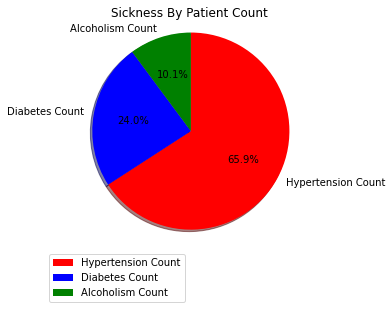

In [54]:
# plotting a pie chart to show the sickness with the highest number of patients
## definining a function to plot the pie chart to avoid repetition
def piechart_sickness_count():
    labels = ["Hypertension Count", "Diabetes Count", 
              "Alcoholism Count"]
    colors = ['red','blue', 'green']
    sizes = [hyp_count, dbt_count, alc_count]
    plt.pie(sizes,labels=labels, colors=colors, counterclock=False, 
                             shadow=True, startangle=90, autopct='%1.1f%%')
    plt.title('Sickness By Patient Count')
    plt.legend(labels, loc='best', bbox_to_anchor=(0.5, -0.04), ncol=1)
    plt.axis('equal')
    plt.show()
# calling the function
piechart_sickness_count()

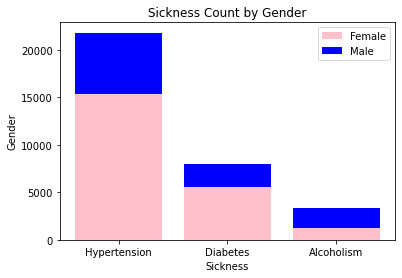

In [55]:
# Stacked bar chart showing the record of sicknesses by gender
x = ['Hypertension', 'Diabetes', 'Alcoholism']
gender = ['Female','Male']
y1 = [hyp_female, dbt_female, alc_female]
y2 = [hyp_male, dbt_male, alc_male]
plt.bar(x, y1, color='pink')
plt.bar(x, y2, bottom=y1, color='blue')
plt.title('Sickness Count by Gender')
plt.xlabel('Sickness')
plt.ylabel('Gender')
plt.legend(gender)
plt.show();

### ANSWER: 
#### More patients suffered from hypertension compared to other sickness with a percentage of approximately 66%.
#### More females suffered from hypertension.
#### More females suffered from diabetes.
#### More males suffered from alcoholism.

### Research Question 4 (Which neighbourhood had the highest number of record and does the location of the hospital (Neighbourhood) affect the show up of a patient?)

I used the groupby method to group the dataset to show the neighbourhoods that showed or didn't show for an appointment by count and converted it into a dataframe as shown below.

In [56]:
neighbourhood_shown = df.groupby('shown')['neighbourhood'].value_counts().to_frame()
neighbourhood_shown

neighbourhood
shown neighbourhood                   
No    JARDIM CAMBURI              1465
      MARIA ORTIZ                 1219
      ITARARÉ                      923
      RESISTÊNCIA                  906
      CENTRO                       703
...                                ...
Yes   PONTAL DE CAMBURI             57
      ILHA DO BOI                   32
      ILHA DO FRADE                  8
      AEROPORTO                      7
      PARQUE INDUSTRIAL              1

[160 rows x 1 columns]

As seen above, the dataframe is not well labelled for easy understanding.
The dataframe will be arranged to columns below using only the top 5 locations that occured for the analysis and renaming the 'neighbourhood' column to 'count'

In [57]:
# renaming the neighbourhood column to count
neighbourhood_shown.rename(columns={'neighbourhood' : 'count'}, inplace=True)
neighbourhood_shown.reset_index(inplace=True)
neighbourhood_shown

,shown,neighbourhood,count
0,No,JARDIM CAMBURI,1465
1,No,MARIA ORTIZ,1219
2,No,ITARARÉ,923
3,No,RESISTÊNCIA,906
4,No,CENTRO,703
...,...,...,...
155,Yes,PONTAL DE CAMBURI,57
156,Yes,ILHA DO BOI,32
157,Yes,ILHA DO FRADE,8
158,Yes,AEROPORTO,7


In [58]:
# getting the top 5 neighbourhood occurence that showed for appointment
top_5_shown = neighbourhood_shown.query('shown == "Yes"').head(5)
top_5_shown.reset_index()
top_5_shown

,shown,neighbourhood,count
80,Yes,JARDIM CAMBURI,6252
81,Yes,MARIA ORTIZ,4586
82,Yes,RESISTÊNCIA,3525
83,Yes,JARDIM DA PENHA,3246
84,Yes,SANTA MARTHA,2635


In [59]:
# getting the top 5 neighbourhood occurence that showed for appointment
top_5_notshown = neighbourhood_shown.query('shown == "No"').head(5)
top_5_notshown.reset_index()
top_5_notshown

,shown,neighbourhood,count
0,No,JARDIM CAMBURI,1465
1,No,MARIA ORTIZ,1219
2,No,ITARARÉ,923
3,No,RESISTÊNCIA,906
4,No,CENTRO,703


In [60]:
# combinining the two data frames into one using merge function (top_5_shown and top_5_notshown)
df_top5_neighbourhood = top_5_shown.merge(top_5_notshown, how='outer', 
                                          on=['shown', 'neighbourhood', 'count'])
df_top5_neighbourhood

,shown,neighbourhood,count
0,Yes,JARDIM CAMBURI,6252
1,Yes,MARIA ORTIZ,4586
2,Yes,RESISTÊNCIA,3525
3,Yes,JARDIM DA PENHA,3246
4,Yes,SANTA MARTHA,2635
5,No,JARDIM CAMBURI,1465
6,No,MARIA ORTIZ,1219
7,No,ITARARÉ,923
8,No,RESISTÊNCIA,906
9,No,CENTRO,703


Depicting a bar chart showing the count of people that showed or didn't show for an appointment based on the neighbourhood using seaborn as shown below.

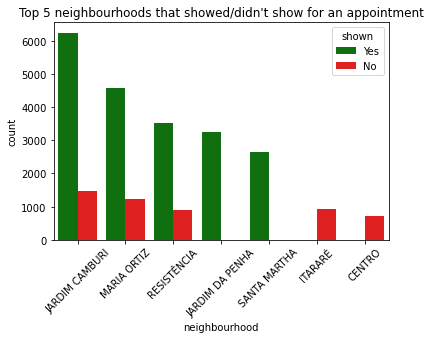

In [61]:
# plotting the bar chart
colors = ['green', 'red']
ax = sns.barplot(x='neighbourhood', y='count', data=df_top5_neighbourhood, hue='shown', palette=colors)
ax.set_title("Top 5 neighbourhoods that showed/didn't show for an appointment")
plt.xticks(rotation=45);

### ANSWER:
#### JARDIM CAMBURI neighbourhood had the highest number of records.
#### All records from JARDIM DA PENHA and SANTA MARTHA neighourhoods showed up for their appointment.
#### All records from ITARARE and CENTRO neighbourhoods didn't show for their appointments.

### Research Question 5 (Are patients enrolled in the scholarship welfare program more likely to show up for their appointments?)

The groupby function was used to group the scholarship column by if people showed or didn't show up for an appointment as seen below.

In [62]:
# scholarship grouping and count
df_sch = df.groupby(['scholarship', 'shown'])['scholarship'].count()
df_sch

scholarship  shown
0            No       19741
             Yes      79924
1            No        2578
             Yes       8283
Name: scholarship, dtype: int64

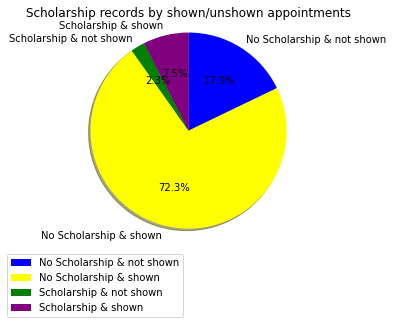

In [63]:
# plotting a pie chart to depict the various categories
## definining a function to plot the pie chart to avoid repetition
def piechart_scholarship():
    labels = ["No Scholarship & not shown", "No Scholarship & shown", 
              "Scholarship & not shown", "Scholarship & shown"]
    colors = ['blue','yellow', 'green', 'purple']
    sizes = df_sch
    plt.pie(sizes,labels=labels, colors=colors, counterclock=False, 
                             shadow=True, startangle=90, autopct='%1.1f%%');
    plt.title('Scholarship records by shown/unshown appointments')
    plt.legend(labels, loc='best', bbox_to_anchor=(0.5, -0.04), ncol=1)
    plt.axis('equal')
    plt.show()
# calling the function    
piechart_scholarship()

### ANSWER:
#### Majority of people who showed up for appointments were people not enrolled in the scholarship program with a percentage of 72.3.

### Research Question 6 (Were patients who received an SMS more likely to show for their appointment?)

The groupby function was used to group the sms_received column by if people showed or didn't show up for an appointment as seen below.

In [64]:
# sms received grouping and count
df_sms = df.groupby(['sms_received', 'shown'])['sms_received'].count()
df_sms

sms_received  shown
0             No       12535
              Yes      62509
1             No        9784
              Yes      25698
Name: sms_received, dtype: int64

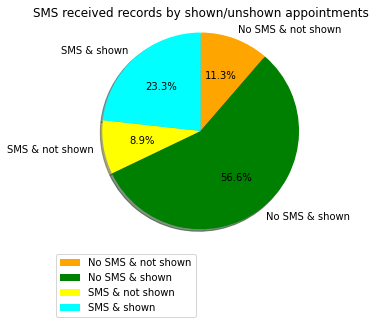

In [65]:
# plotting a pie chart to depict the various categories
## definining a function to plot the pie chart to avoid repetition
def piechart_sms():
    labels = ["No SMS & not shown", "No SMS & shown", 
              "SMS & not shown", "SMS & shown"]
    colors = ['orange','green', 'yellow', 'cyan']
    sizes = df_sms
    plt.pie(sizes,labels=labels, colors=colors, counterclock=False, 
                             shadow=True, startangle=90, autopct='%1.1f%%');
    plt.title('SMS received records by shown/unshown appointments')
    plt.legend(labels, loc='best', bbox_to_anchor=(0.5, -0.04), ncol=1)
    plt.axis('equal')
    plt.show()
# calling the function
piechart_sms()

### ANSWER:
#### Majority of people who showed up for appointments were people who did not receive an sms with a percentage of 56.6.

### Research Question 7 (Does Age have an influence on a patient showing up or not?)

To answer this, I grouped the age column into six different categories which are:
1. Infants 0-1 years
2. Children 2-12 years
3. Teenagers 13-19 years
4. Young Adults 20-24 years
5. Adults 25-69 years
6. Aged >= 70 years

After grouping, I used the query method and len function to get the records of people who fell into a certain category with reference to if they showed or didn't show for an appointment as seen in the next lines of code.

In [66]:
# querying for infants category and getting the record count for those that showed for an appointment
infants_shown = len(df.query('age == 0 & age <= 1 & shown == "Yes"'))
infants_shown

2900

In [67]:
# querying for infants category and getting the record count for those that didn't show for an appointment
infants_not_shown = len(df.query('age == 0 & age <= 1 & shown == "No"'))
infants_not_shown

639

In [68]:
# querying for children category and getting the record count for those that showed for an appointment
children_shown = len(df.query('age >= 2 & age <= 12 & shown == "Yes"'))
children_shown

11971

In [69]:
# querying for children category and getting the record count for those that didn't show for an appointment
children_not_shown = len(df.query('age >= 2 & age <= 12 & shown == "No"'))
children_not_shown

3253

In [70]:
# querying for teenagers category and getting the record count for those that showed for an appointment
teenagers_shown = len(df.query('age >= 13 & age <= 19 & shown == "Yes"'))
teenagers_shown

6941

In [71]:
# querying for teenagers category and getting the record count for those that didn't show for an appointment
teenagers_not_shown = len(df.query('age >= 13 & age <= 19 & shown == "No"'))
teenagers_not_shown

2434

In [72]:
# querying for young adults category and getting the record count for those that showed for an appointment
young_adults_shown = len(df.query('age >= 20 & age <= 24 & shown == "Yes"'))
young_adults_shown

5131

In [73]:
# querying for young adults category and getting the record count for those that didn't show for an appointment
young_adults_not_shown = len(df.query('age >= 20 & age <= 24 & shown == "No"'))
young_adults_not_shown

1725

In [74]:
# querying for adults category and getting the record count for those that showed for an appointment
adults_shown = len(df.query('age >= 25 & age <= 69 & shown == "Yes"'))
adults_shown

51561

In [75]:
# querying for adults category and getting the record count for those that didn't show for an appointment
adults_not_shown = len(df.query('age >= 25 & age <= 69 & shown == "No"'))
adults_not_shown

12401

In [76]:
# querying for aged category and getting the record count for those that showed for an appointment
aged_shown = len(df.query('age >= 70 & shown == "Yes"'))
aged_shown

7845

In [77]:
# querying for aged category and getting the record count for those that didn't show for an appointment
aged_not_shown = len(df.query('age >= 70 & shown == "No"'))
aged_not_shown

1452

Below is a bar chart depicting the count of people that showed or didn't show for an appointment based on the age categories.

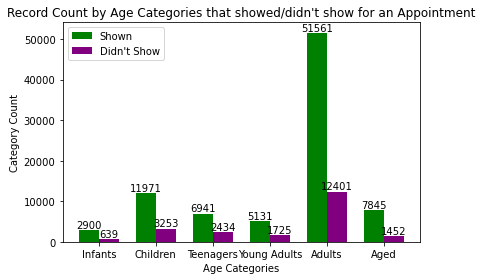

In [78]:
# plotting a bar chart
## definining a function to plot the bar chart to avoid repetition
def barchart_age_category():
    labels = ['Infants', 'Children', 'Teenagers', 'Young Adults', 'Adults', 'Aged']
    shown = [infants_shown, children_shown, teenagers_shown, young_adults_shown, adults_shown, aged_shown]
    not_shown = [infants_not_shown, children_not_shown, teenagers_not_shown, 
                 young_adults_not_shown, adults_not_shown, aged_not_shown]
    x = np.arange(len(labels))
    width = 0.35 
    fig, ax = plt.subplots()
    bar1 = ax.bar(x - width/2, shown, width, label='Shown', color='green')
    bar2 = ax.bar(x + width/2, not_shown, width, label="Didn't Show", color='purple')
    ax.set_ylabel('Category Count')
    ax.set_xlabel('Age Categories')
    ax.set_title("Record Count by Age Categories that showed/didn't show for an Appointment")
    ax.set_xticks(x, labels)
    ax.legend()
    ax.bar_label(bar1)
    ax.bar_label(bar2)
    fig.tight_layout()
    plt.show()
# calling the function
barchart_age_category()

### ANSWER:
#### The highest appointment turn out were from adults followed by children.
#### The lowest appointment turn out were from infants followed by young adults.

### Researh Question 8 (Does the the difference between the scheduled and appointment day affect a patient showing up?)

This is where the day_difference column created earlier comes into use.
I grouped the day_difference into two categories which are:
1. When the day difference is 0 (this means that the appointment day was the scheduled day i.e.same day)
2. When the day_difference is greater than 0 (this means that the appointment day was different from the scheduled day i.e. not the same day)
The query and len function was then used to determine the number of record for each category that showed for an appointment.
The proportion with reference to each category shown was then calculated and plotted in a bar chart.

In [79]:
# querying for 'same day' category and getting the record count for those that showed for an appointment
same_day_shown = len(df.query('day_difference == 0 & shown == "Yes"'))
same_day_shown

36770

In [80]:
# querying and getting the total record count for 'same day' category
same_day_total = len(df.query('day_difference == 0'))
same_day_total

38562

In [81]:
# querying for 'not same day' category and getting the record count for those that showed for an appointment
not_same_day_shown = len(df.query('day_difference > 0 & shown == "Yes"'))
not_same_day_shown

51437

In [82]:
# querying and getting the total record count for 'not same day' category
not_same_day_total = len(df.query('day_difference > 0'))
not_same_day_total

71964

In [83]:
# getting the proportion of people that attended appointments under the 'same day' category
same_day_proportion = same_day_shown/same_day_total * 100
same_day_proportion

95.35293812561589

In [84]:
# getting the proportion of people that attended appointments under the 'not same day' category
not_same_day_proportion = not_same_day_shown/not_same_day_total * 100
not_same_day_proportion

71.47601578567061

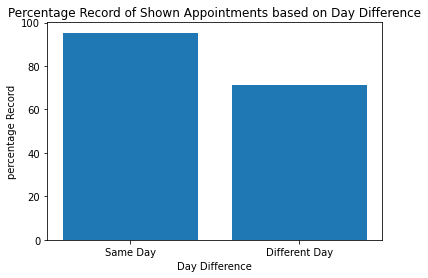

In [85]:
# bar chart depicting the percentage proportion of the two categories
locations = [1, 2]
heights = [same_day_proportion, not_same_day_proportion]
labels = ['Same Day', 'Different Day']
colors = ['green', 'orange']
plt.bar(locations, heights, tick_label=labels)
plt.title('Percentage Record of Shown Appointments based on Day Difference')
plt.xlabel('Day Difference')
plt.ylabel('percentage Record');

### ANSWER
#### There were more appointment turn out from patients whose scheduled day was their appointment day (approximately 95%) compared to those whose appointment day was different from their scheduled day (approximately 71%).

<a id='conclusions'></a>
## Conclusions

My findings and results are stated below:

#### FINDINGS:
1. The dataset contained 110527 rows and 14 columns.
2. There were no null values in the dataset.
3. There was one incorrect age entry which was dropped, thereby reducing the number of rows to 110526.
4. I changed all the column labels to lower case.
5. Two columns were dropped (patientid and appointmentid) that were not needed for my analysis which reduced the number of columns to 12.
6. I changed the datatype of sheduledday and appointmentday columns from string to datetime.
7. I created a new column label called day_difference which had some negative values possibly due to incorrect entry or mistakenly swapping the scheduled day entry with the appointment day entry. The absolute function(abs()) was used to change all negative results in the new column to positive. This increased the number of columns to 13.
8. I changed the name of some column labels by re-spelling them (hypertension and handicap columns).
9. I changed the column name of the last column to 'shown' and then swapped the 'No' entries with 'Yes' and the 'Yes' entries with 'No' for better understanding.

#### RESULTS TO QUESTIONS ASKED:
1. It was discovered that both genders (male and female) showed up equally for an appointment.
2. From analysis, patients without any of the sicknesses (hypertension, diabetes and alcoholism) showed up more for appointments.
3. Hypertension recorded the highest number of patients suffering from it with 65.9%.
- Females suffered more from hypertension.
- Females suffered more from diabetes.
- Males suffered more from alcoholism.
4. From analysis,
- JARDIM CAMBURI neighbourhood had the highest number of records.
- All records from JARDIM DA PENHA and SANTA MARTHA neighourhoods showed up for their appointment.
- All records from ITARARE and CENTRO neighbourhoods didn't show for their appointments.
5. Majority of people who showed up for appointments were people not enrolled in the scholarship program which was 72.3%.
6. Majority of people who showed up for appointments were people who did not receive an sms which was 56.6%.
7. From analysis,
- The highest appointment turn out were from adults followed by children.
- The lowest appointment turn out were from infants followed by young adults.
8. There were more appointment turn out from patients whose scheduled day was their appointment day (approximately 95%) compared to those whose appointment day was different from their scheduled day (approximately 71%).

### Limitations

One limitation this data has is that information was not given regarding the kind of appointment a patient scheduled in terms of sickness type which makes it difficult to analyze for if a patient showed up for a certain sickness appointment based on the sickness the patient had.

Additional research can be done to provide data with a column given the appointments by sickness i.e. appointment for hypertension, appointment for diabetes e.t.c.

## Submitting your Project 

In [86]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1